# Gaussian Bayesian Networks

In [1]:
import rdata
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def visualize_bn(model):
    nx_graph = nx.DiGraph()
    nx_graph.add_edges_from(model.edges())
    pos = nx.spring_layout(nx_graph, seed=42)
    nx.draw(nx_graph, pos, with_labels=True, node_size=2000, font_size=14, font_weight='bold')
    plt.show()

In [5]:
parsed = rdata.parser.parse_file("./ecoli70.rda")
converted = rdata.conversion.convert(parsed)
converted

/Users/pin083/.local/lib/python3.8/site-packages/rdata/conversion/_conversion.py:843: UserWarning: Missing constructor for R class "bn.fit.gnode". The underlying R object is returned instead.
  warnings.warn(
/Users/pin083/.local/lib/python3.8/site-packages/rdata/conversion/_conversion.py:843: UserWarning: Missing constructor for R class "bn.fit". The constructor for class "bn.fit.gnet" will be used instead.
  warnings.warn(
/Users/pin083/.local/lib/python3.8/site-packages/rdata/conversion/_conversion.py:843: UserWarning: Missing constructor for R class "bn.fit.gnet". The underlying R object is returned instead.
  warnings.warn(


{'bn': {'aceB': {'node': ['aceB'],
   'parents': ['icdA'],
   'children': [],
   'coefficients': array([0.13242569, 1.04635758]),
   'sd': array([0.29211684]),
   'residuals': array([-0.13242569,  0.13332396, -0.26730127,  0.01088221,  0.66322456,
          -0.10960194, -0.15671517, -0.02590858, -0.1154781 ]),
   'fitted.values': array([ 0.13242569, -0.33592396, -1.91309873, -0.95118221, -1.87982456,
          -2.07559806, -1.72318483, -2.61039142, -2.1032219 ])},
  'asnA': {'node': ['asnA'],
   'parents': ['ygcE'],
   'children': ['icdA', 'lacA', 'lacY', 'lacZ'],
   'coefficients': array([0.34941501, 0.79745405]),
   'sd': array([0.30228636]),
   'residuals': array([-0.34941501,  0.30445376,  0.33767502,  0.24240818,  0.12867064,
          -0.22528832,  0.12482079, -0.354159  , -0.20916605]),
   'fitted.values': array([0.34941501, 1.36074624, 1.98132498, 1.85389182, 3.00732936,
          3.10788832, 1.85157921, 2.766259  , 1.66776605])},
  'atpD': {'node': ['atpD'],
   'parents': ['su

In [13]:
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum

In [32]:
import numpy as np
from pgmpy.models import LinearGaussianBayesianNetwork
from pgmpy.factors.continuous import LinearGaussianCPD


In [33]:
nodes_data = {
    'aceB': {
        'node': ['aceB'],
        'parents': ['icdA'],
        'coefficients': np.array([0.13242569, 1.04635758]),
        'sd': np.array([0.29211684]),
    },
    'asnA': {
        'node': ['asnA'],
        'parents': ['ygcE'],
        'children': ['icdA', 'lacA', 'lacY', 'lacZ'],
        'coefficients': np.array([0.34941501, 0.79745405]),
        'sd': np.array([0.30228636]),
    }
}

In [35]:
#Create an empty Linear Gaussian Bayesian Network
model = LinearGaussianBayesianNetwork()

# Add nodes and edges
for node_data in nodes_data.values():
    node = node_data['node'][0]
    parents = node_data['parents']
    
    # Add the node to the model
    model.add_node(node)
    
    # Add edges from parents to the node
    for parent in parents:
        model.add_edge(parent, node)

# Add CPDs (Conditional Probability Distributions) for each node
for node_data in nodes_data.values():
    node = node_data['node'][0]
    parents = node_data['parents']
    coefficients = node_data['coefficients']
    sd = node_data['sd'][0]
    
    cpd = LinearGaussianCPD(node, coefficients, sd, parents)
    model.add_cpds(cpd)

# Check if the model is consistent
print("Model is consistent: ", model.check_model())

# Print model summary
print("\nModel Summary:")
print(model)

Model is consistent:  True

Model Summary:



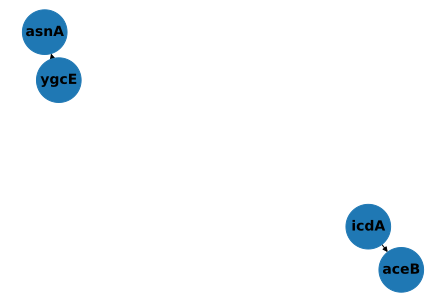

In [47]:
visualize_bn(model)


In [29]:
parents = converted_bn[node]['parents']
children = converted_bn[node]['children']
mu = converted_bn[node]['coefficients']
sd = converted_bn[node]['sd']



['icdA']

In [18]:
bn

(pyAgrum.BayesNet<double>@0x7f90aa88ea00) BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}